In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Given pairs of data points $(\mathbf{x},y)$, we are trying estimate a target function $y = f(\mathbf{x})$.
We are going to implement a perceptron in 2 dimensions $X = [-1,1] \times [-1,1]$ with uniform probability for each $\mathbf{x} \in X$.
Since we are in 2 dimensions, each $\mathbf{x} = (x_0, x_1)$ with an associated label $y$.

First we need to generated a target funtion $f$ that we are going to estimate. We do this by taking two random, uniformly distributed points in  $[−1,1]\times[−1,1][−1,1]\times[−1,1]$ and taking the line passing through them.

In [2]:
def generate_line():    
    """
    Generates a line in the interval [-1,1] x [-1,1]
    Returns (f, [-1, 1], [f(-1), f(1)]) so you can plot on a [-1,1] x [-1,1] plot
    """
    x_0,y_0,x_1,y_1 = np.random.uniform(-1,1,4)
    m = (y_1 - y_0) / (x_1 - x_0)
    b = y_0 - x_0 * m
    f = lambda x: m * x + b
    return (f, [-1, 1], [f(-1), f(1)])

Now we can generate the "unknown" $f$, which will classify the points.

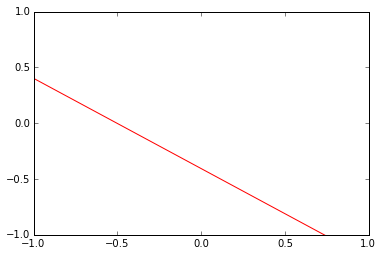

In [3]:
f, f_x_0, f_x_1 = generate_line()

plt.axis([-1,1,-1,1])
plt.plot(f_x_0,f_x_1, 'r');

Now we can generate some random points in $[−1,1]\times[−1,1], [−1,1]\times[−1,1]$ which will be classified by this true $f$.

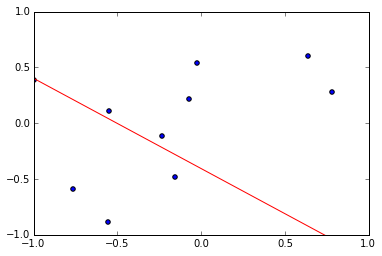

In [6]:
x_0 = np.random.uniform(-1, 1, 10)
x_1 = np.random.uniform(-1, 1, 10)

plt.axis([-1,1,-1,1])
plt.plot(f_x_0, f_x_1, 'r');
plt.scatter(x_0,x_1);

We can see from this plot which points can be labeled as 1 and which can be labeled as -1. Now we just need to implement this. We can mark the points above  ff  as 1, 'x', and points below the line as -1, 'o'.

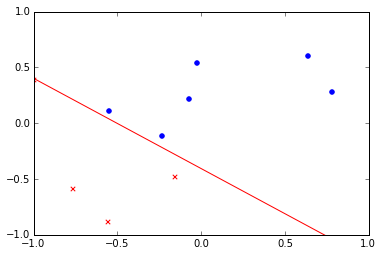

In [13]:
test_above = f(x_0) > x_1
x_above = x_0[test_above]
y_above = x_1[test_above]

test_below = f(x_0) <= x_1
x_below = x_0[test_below]
y_below = x_1[test_below]


plt.axis([-1,1,-1,1])
plt.plot(f_x_0, f_x_1, 'r')
plt.scatter(x_above, y_above, marker='x', color='red')
plt.scatter(x_below, y_below, marker='o', color='blue');

Now we have a way to generate an unknown function f and classify the points. The next step is to create a perceptron learning algorithm function.

In [14]:
def pla(x, classes, max_iter=100):
    "Returns weight of the vector and number of iterations"
    # n is number of data points, and d is features
    n,d = np.shape(x)
    x_0 = np.ones(n)
    x = np.column_stack((x_0, x))
    weights = np.zeros(d + 1)
            
    i = 0
    results = np.sign(np.dot(weights, x.T))
    while not np.array_equal(results, classes) and i < max_iter:
        # Get a misclassified point
        for (j, (pred,actual)) in enumerate(zip(results, classes)):
            if pred != actual:
                # Update weights
                # w(t + 1) = w(t) + y(t) x(t)
                weights = weights + classes[j] * x[j]
                break
        results = np.sign(np.dot(weights, x.T))        
        i += 1
        
    return weights, i

In [16]:
# Get the classes from our function
classes = map(lambda x: 1 if x else -1, f(x_0) > x_1)

# Pass in (x,y) pairs and the classes
[b,w_1,w_2],_ = pla(np.column_stack((x_0,x_1)), classes)

We can now use the weights to plot the line to see where our $g$ (the learned algorithm which estimates $f$) ended up

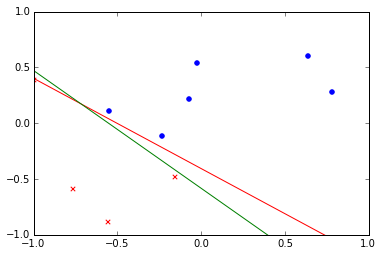

In [23]:
g = lambda x: -(b + w_1 * x) / w_2

plt.axis([-1,1,-1,1])
plt.plot(f_x_0, f_x_1, 'r')
# Can plot the line by using the min and max on axis [-1,1]
#  and evaluating g at these points
plt.plot([-1,1], [g(-1), g(1)], 'g')
plt.scatter(x_above, y_above, marker='x', color='red')
plt.scatter(x_below, y_below, marker='o', color='blue');